# Genie Talk Internship Task (Single Language Challenge)

# Importing all required libraries

In [67]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# loading training data

In [68]:
df = pd.read_excel('/content/drive/MyDrive/Genie Talk/Single language challenge (NLP Task)/train.xlsx')
df.head()

,gold_label,sentence1,sentence2
0,contradiction,A group of men with cowboy hats are watching a...,A group of women are watching a horse race
1,entailment,A kid with his head shaved sitting and holding...,Child sits with a cigarette.
2,neutral,A woman riding a bicycle past a car and a grou...,A woman riding a bicycle near a group of her f...
3,neutral,A woman looking through what appears to be a t...,An female astronamer looking toward the stars ...
4,entailment,A large group of people stand outside on a roa...,One group of people are watching what another ...


In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Check Null Value

In [70]:
df.isnull().sum()

gold_label    0
sentence1     0
sentence2     0
dtype: int64

### Check shape of data

In [71]:
df.shape

(9349, 3)

### Check information of data

In [72]:
df.describe()

,gold_label,sentence1,sentence2
count,9349,9349,9349
unique,3,3318,9186
top,entailment,"A male child with blond-hair, green eyes, and ...",A man is outside.
freq,3166,6,6


### Visualize length of Target variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


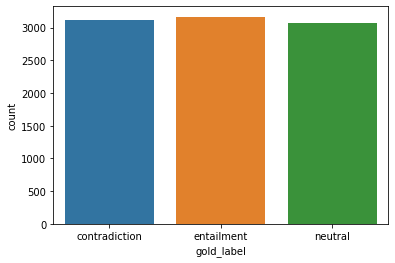

In [73]:
sns.countplot(df['gold_label'])
plt.show()

# convert two sentences into one sentence

In [74]:
df['sentence'] = df['sentence1']+df['sentence2']
df.drop(columns=['sentence1','sentence2'],axis=1,inplace=True)

In [75]:
df.head()

,gold_label,sentence
0,contradiction,A group of men with cowboy hats are watching a...
1,entailment,A kid with his head shaved sitting and holding...
2,neutral,A woman riding a bicycle past a car and a grou...
3,neutral,A woman looking through what appears to be a t...
4,entailment,A large group of people stand outside on a roa...


In [76]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# LabelEncoding on target data

In [77]:
label = LabelEncoder()
df['gold_label'] = label.fit_transform(df['gold_label'])
df.head()

,gold_label,sentence
0,0,A group of men with cowboy hats are watching a...
1,1,A kid with his head shaved sitting and holding...
2,2,A woman riding a bicycle past a car and a grou...
3,2,A woman looking through what appears to be a t...
4,1,A large group of people stand outside on a roa...


In [78]:
df['gold_label'].value_counts()   

1    3166
0    3114
2    3069
Name: gold_label, dtype: int64

# Splitting the data into training set and test set

In [79]:
X_train , X_test  = train_test_split(df,random_state=51,test_size=0.2)
X_train.shape , X_test.shape

((7479, 2), (1870, 2))

# Reset X_train index

In [80]:
X_train.reset_index(inplace=True)

# remove stopwords and apply Lemmatization on X_train


In [81]:
ps = WordNetLemmatizer()
corpus = []
for i in range(len(X_train['sentence'])):
    rev = re.sub('[^a-zA-Z]',' ',X_train['sentence'][i])
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.lemmatize(word) for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    corpus.append(rev)

In [82]:
corpus

['little boy standing alone wooded park little boy alone',
 'person red playing football beach someone playing beach',
 'three people canoeing stream people outdoors',
 'man gray shirt sort hawaiian style shirt department store man shopping hardware store',
 'boy fall scooter obstacle course person fall scooter obstacle course',
 'people walking along street people walking parade',
 'someone holding bag orange walking outside someone juggling orange',
 'young man red hat gray shirt jean performs trick air skateboard young man wearing hat',
 'welder working outside concrete rublea welder attaching two piece metal',
 'athlete slough jet hockey team skating ice rink hockey stick equipped olympic hopeful perform swim routine',
 'body boarder dumped beach wave whilst surfer standing around water surfer pro',
 'boy dog lawn outside house front flower bed boy dog walk lawn looking toy',
 'shirtless man cooking outdoor grill someone grilling',
 'man brown hooded sweatshirt outdoors upright bas

In [83]:
len(corpus)

7479

# Convert into matrix

In [84]:
cv = CountVectorizer()
train_df = cv.fit_transform(corpus)

# Applying Hyperparameter Tuning

In [85]:
param_grid = {

'criterion' : ['gini' , 'entropy'],

'bootstrap': [True],

'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],

'max_features': ['auto', 'sqrt'],

'min_samples_leaf': [1, 2, 4],

'min_samples_split': [2, 5, 10],

'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000] ,
'max_leaf_nodes'  : [15, 20, 25],

}

# Define my model using RandomForestClassifier

In [86]:
rfc = RandomForestClassifier()

# Applying hyperparameters

In [87]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(train_df , X_train['gold_label'])

In [ ]:
rf_random.best_params_

# remove all special and numeric, and remove stopwords and apply Lemmatization on X_test

In [ ]:
# ps = WordNetLemmatizer()
X_test.reset_index(inplace=True)
corpus1 = []
for i in range(len(X_test['sentence'])):
    rev = re.sub('[^a-zA-Z]',' ',X_test['sentence'][i])
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.lemmatize(word) for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    corpus1.append(rev)

In [ ]:
corpus1

# Converting into matrix

In [ ]:
test_df = cv.transform(corpus1)

# Applying prediction

In [ ]:
pred = rf_random.predict(test_df)

# Check score,confusion_matrix,classification_report, accuracy_score

In [ ]:
rf_random.score(test_df,X_test['gold_label'])

In [ ]:
print(f"Accuracy Score = {accuracy_score(pred,X_test['gold_label'])}")
print(f"Confusion Matrix =\n {confusion_matrix(pred,X_test['gold_label'])}")
print(f"Classification Report = \n{classification_report(pred,X_test['gold_label'])}")

# Actual and predicted data

In [ ]:
diff = pd.DataFrame(np.c_[X_test['gold_label'] , pred] , columns=["Actual" , "Predicted"])
diff

# Convert 0: contradiction, 1: entailment, 2: neutral and show actual and predicted data

In [ ]:
actual = []
for i in X_test['gold_label']:
    if i==0:
        actual.append("contradiction")
    elif i==1:
        actual.append("entailment")
    else:
        actual.append("neutral")
        
predicted = []

for i in pred:
    if i==0:
        predicted.append("contradiction")
    elif i==1:
        predicted.append("entailment")
    else:
        predicted.append("neutral")

In [ ]:
pd.DataFrame(np.c_[actual,predicted] , columns=["Actual" , "Predicted"])

# Loading Test data

In [ ]:
test_data = pd.read_excel("/content/drive/MyDrive/Genie Talk/Single language challenge (NLP Task)/test.xlsx")
test_data.head()

# join first and second sentence in sentence and remove first sentence and and second sentence and also remove stopwards and applying lemmatize

In [ ]:
test_data['sentence'] = test_data['sentence1'] + test_data['sentence2']
test_data.drop(columns=['sentence1','sentence2'],axis=1,inplace=True)

test_corpus = []
for i in range(len(test_data['sentence'])):
    rev = re.sub('[^a-zA-Z]',' ',test_data['sentence'][i])
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.lemmatize(word) for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    test_corpus.append(rev)

In [ ]:
test_corpus

# Converting into matrix and applying prediction

In [ ]:
test_df1 = cv.transform(test_corpus)

pred1 = rf_random.predict(test_df1)

# Convert 0: contradiction, 1: entailment, 2: neutral and show the predicted data

In [ ]:
predicted1 = []

for i in pred1:
    if i==0:
        predicted1.append("contradiction")
    elif i==1:
        predicted1.append("entailment")
    else:
        predicted1.append("neutral")
print(predicted1)

# loading test_sample, predicted_sample DataSet

In [ ]:
test_sample = pd.read_excel("/content/drive/MyDrive/Genie Talk/Single language challenge (NLP Task)/test_sample.xlsx")
predicted_sample = pd.read_excel("/content/drive/MyDrive/Genie Talk/Single language challenge (NLP Task)/predicted_sample.xlsx")

In [ ]:
test_sample

In [ ]:
predicted_sample

# Applying LabelEncoding on gold_label in predicted_sample

In [ ]:
predicted_sample['gold_label'] = label.fit_transform(predicted_sample['gold_label']) # 0:contradiction, 1:entailment, 2:neutral 

# join first and second sentence in sentence and remove first sentence and and second sentence and also remove stopwards and applying lemmatize

In [ ]:
test_sample['sentence'] = test_sample['sentence1'] + test_sample['sentence2']
test_sample.drop(columns=['sentence1','sentence2'],axis=1,inplace=True)

test_sample_corpus = []
for i in range(len(test_sample['sentence'])):
    rev = re.sub('[^a-zA-Z]',' ',test_sample['sentence'][i])
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.lemmatize(word) for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    test_sample_corpus.append(rev)

In [ ]:
test_sample_corpus

# Converting into matrix and applying prediction

In [ ]:
test_sample_df = cv.transform(test_sample_corpus)

pred2 = rf_random.predict(test_sample_df)
pred2

# Convert 0: contradiction, 1: entailment, 2: neutral and show actual and predicted data

In [ ]:
actual2 = []
for i in predicted_sample['gold_label']:
    if i==0:
        actual2.append("contradiction")
    elif i==1:
        actual2.append("entailment")
    else:
        actual2.append("neutral")
        
predicted2 = []

for i in pred2:
    if i==0:
        predicted2.append("contradiction")
    elif i==1:
        predicted2.append("entailment")
    else:
        predicted2.append("neutral")

In [ ]:
pd.DataFrame(np.c_[actual2,predicted2] , columns=["Actual" , "Predicted"])

# Thanks